In [2]:
import pickle
import matplotlib.pyplot as plt

# Load the data

In [5]:
data_path = "data.pickle"  # if the file can't be found try absolute path

# The data is stored in .pickle format, so we use pickle module to load it. 
# It takes several seconds to load the file. 
with open(data_path, "rb") as file:
    records = pickle.load(file)
    file.close()

The loaded data is stored in a nested dictionary, where the first level is dyad and the second is recording block. 
We have recorded 15 dyads (in the datset only 14 due to some thecnical issues). The dyad id (dict key) is a string in the format '[xxx, yyy]', where xxx stands for id of the person who was on the brighter side of the screen (blue player, p0) and yyy for the other person (orange player, p1).

In [6]:
# Print all dyads ids
print(records.keys())

dict_keys(['[100, 101]', '[102, 103]', '[104, 105]', '[200, 201]', '[202, 203]', '[204, 205]', '[206, 207]', '[208, 209]', '[210, 211]', '[300, 301]', '[304, 305]', '[306, 307]', '[308, 309]', '[310, 311]'])


There are available three blocks (each twenty minumtes) per dyad (few have only two).

In [7]:
# Print an example of block ids. The keys are integers. 
print(records['[200, 201]'].keys())

dict_keys([1, 2])


# Structure of the recordings

Each recording is stored in pandas DataFrame - table. 
Rows are consequent frames. The sampling rate is ca. 120 frames / second. 
Each column stores different recorded and computed variables.

In [8]:
# Print the first 5 rows of the table
records['[100, 101]'][1].head()

,timestamp,p0_score,p1_score,p0_agent_x,p0_agent_y,p1_agent_x,p1_agent_y,p0_gaze_x,p0_gaze_y,p1_gaze_x,...,coop0_entered_by_p1,coop1_entered_by_p0,coop1_entered_by_p1,comp_left_by_p0,comp_left_by_p1,coop0_left_by_p0,coop0_left_by_p1,coop1_left_by_p0,coop1_left_by_p1,org_timestamp
0,0.000000,0.0,0.0,0.5,0.5,0.5,0.5,0.000000,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,3659.639546
1,0.007808,0.0,0.0,0.5,0.5,0.5,0.5,0.468573,0.523261,0.603357,...,0,0,0,0,0,0,0,0,0,3659.647354
2,0.016175,0.0,0.0,0.5,0.5,0.5,0.5,0.467244,0.523696,0.599759,...,0,0,0,0,0,0,0,0,0,3659.655721
3,0.025929,0.0,0.0,0.5,0.5,0.5,0.5,0.466559,0.523555,0.599048,...,0,0,0,0,0,0,0,0,0,3659.665475
4,0.032879,0.0,0.0,0.5,0.5,0.5,0.5,0.467537,0.525252,0.599965,...,0,0,0,0,0,0,0,0,0,3659.672425


In [9]:
# Print all columns in the table
records['[100, 101]'][1].columns

Index(['timestamp', 'p0_score', 'p1_score', 'p0_agent_x', 'p0_agent_y',
       'p1_agent_x', 'p1_agent_y', 'p0_gaze_x', 'p0_gaze_y', 'p1_gaze_x',
       'p1_gaze_y', 'comp_x', 'comp_y', 'coop0_x', 'coop0_y', 'coop1_x',
       'coop1_y', 'comp_collected_by_p0', 'comp_collected_by_p1',
       'coop0_collected', 'coop1_collected', 'comp_entered_by_p0',
       'comp_entered_by_p1', 'coop0_entered_by_p0', 'coop0_entered_by_p1',
       'coop1_entered_by_p0', 'coop1_entered_by_p1', 'comp_left_by_p0',
       'comp_left_by_p1', 'coop0_left_by_p0', 'coop0_left_by_p1',
       'coop1_left_by_p0', 'coop1_left_by_p1', 'org_timestamp'],
      dtype='object')

## Descirption of the variables (columns)
- 'timestamp' - normalized timestamp of the frames in seconds. The last entry is around 1200, which is 20min. 
- 'org_timestamp' - original timestamps from the eyetracker

**xy-position of the mouse controlled agent on the screen**
- 'p0_agent_x', 'p0_agent_y' - for player p0 (blue player)
- 'p1_agent_x', 'p1_agent_y' - for player p1 (orange player)

**The actual mose position in the system. This is irrelevant unless you want to expore actuall mouse movements. The agent position doesn't always correspond to the hidden mouse cursor position, because we have a speed limit in the game. If a subject moves the mouse too quickly the agent will follow the cursor.**
'p0_aim_x', 'p0_aim_y', 'p1_aim_x', 'p1_aim_y'

**xy-position of the gaze**
- 'p0_gaze_x', 'p0_gaze_y' - for player p0 (blue player)
- 'p1_gaze_x', 'p1_gaze_y' - for player p1 (orange player)

**Score - collected money in cents**
- 'p0_score', 'p1_score' -  for player p0 and p1 respecively

**xy-position of the targets on the screen**
- 'comp_x', 'comp_y' - single target 
- 'coop0_x', 'coop0_y' - blue joint
- 'coop1_x', 'coop1_y' - orange joint

**Entry '1' indicates a frame when a specific target was collected**
- 'comp_collected_by_p0' - player p0 collected a single target
- 'comp_collected_by_p1' - player p1 collected a single target
- 'coop0_collected' - a blue joint target was collected 
- 'coop1_collected' - an orange joint target was collected 

**Entry '1' indicates a frame when a player entered or exited a target**
- 'comp_entered_by_p0', 'comp_left_by_p0', 'comp_entered_by_p1', 'comp_left_by_p1' 
- 'coop0_entered_by_p0', 'coop1_left_by_p0', 'coop0_entered_by_p1', 'coop0_left_by_p1' 
- 'coop1_entered_by_p0', 'coop1_left_by_p0', 'coop1_entered_by_p1', 'coop1_left_by_p1' 

# Plot 3 seconds of the game

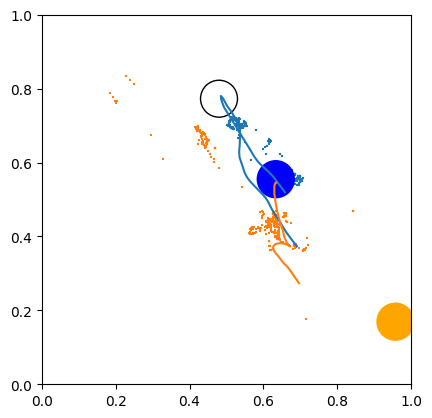

In [25]:
dyad = '[100, 101]'
block = 1
rec = records[dyad][block]

rec_interval = rec.loc[(rec['timestamp'] >= 15) & (rec['timestamp'] < 18)]  # get the frames in the interval between 15th and 18th second.

fig, ax = plt.subplots()

# Plot agent trajectories
ax.plot(rec_interval['p0_agent_x'], rec_interval['p0_agent_y'])
ax.plot(rec_interval['p1_agent_x'], rec_interval['p1_agent_y'])

# Plot eye-tracking
ax.scatter(rec_interval['p0_gaze_x'], rec_interval['p0_gaze_y'], marker='+', s=1, color='tab:blue')
ax.scatter(rec_interval['p1_gaze_x'], rec_interval['p1_gaze_y'], marker='+', s=1, color='tab:orange')

# Plot targets
comp = plt.Circle(rec_interval[['comp_x', 'comp_y']].iloc[0], radius=0.05, color='black', fill=False)
coop0 = plt.Circle(rec_interval[['coop0_x', 'coop0_y']].iloc[0], radius=0.05, color='blue', fill=True)
coop1 = plt.Circle(rec_interval[['coop1_x', 'coop1_y']].iloc[0], radius=0.05, color='orange', fill=True)

ax.add_artist(comp)
ax.add_artist(coop0)
ax.add_artist(coop1)

ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_aspect(1)